# Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn import tree

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_base = pd.read_csv(r'dataframes/baseline_dataframe.csv')
df_base.head()

,state,converted_pledged_amount,goal_usd,backers_count,len_of_name,len_of_description,creation_time_to_launch,planned_time,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,staff_pick
0,1,1950,1000.0000,47,23,125,194.546111,720.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,22404,15000.0000,271,51,108,5398.295000,720.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,165,12160.6569,3,34,133,129.195833,1439.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,2820,2800.0000,3,40,121,98.460000,720.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,3725,3500.0000,35,31,134,3824.832222,720.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_new = df_base.drop(columns = ['converted_pledged_amount', 'backers_count'])

In [6]:
df_new.head()

,state,goal_usd,len_of_name,len_of_description,creation_time_to_launch,planned_time,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,staff_pick
0,1,1000.0000,23,125,194.546111,720.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,15000.0000,51,108,5398.295000,720.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,12160.6569,34,133,129.195833,1439.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,2800.0000,40,121,98.460000,720.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,3500.0000,31,134,3824.832222,720.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Prepare dataset for modelling

In [7]:
### Devide dataset in X and y:
#X = df_base[['backers_count', 'len_of_name']]
X = df_new.iloc[:, 1:]
y = df_new.iloc[:, 0]
y

0         1
1         1
2         0
3         1
4         1
5         1
6         1
7         1
8         1
9         0
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        0
23        1
24        1
25        0
26        1
27        1
28        0
29        1
         ..
168947    1
168948    0
168949    0
168950    1
168951    0
168952    1
168953    0
168954    0
168955    0
168956    0
168957    1
168958    0
168959    0
168960    0
168961    1
168962    1
168963    0
168964    0
168965    0
168966    0
168967    1
168968    1
168969    0
168970    0
168971    0
168972    1
168973    1
168974    1
168975    1
168976    1
Name: state, Length: 168977, dtype: int64

In [8]:
### Scaling:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scalerNB = MinMaxScaler()
X_scaled_NB = scalerNB.fit_transform(X)

In [9]:
### Train test split:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=41)

In [10]:
X_train_scaled,X_test_scaled,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=41)

In [11]:
X_train_scaled_NB ,X_test_scaled_NB ,y_train,y_test = train_test_split(X_scaled_NB,y,test_size=0.25,random_state=41)

In [12]:
test = pd.DataFrame(X_train_scaled)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,-0.035192,-0.242267,0.271518,-0.298927,-0.192408,5.057378,-0.182524,-0.134648,-0.189924,-0.235345,-0.405773,-0.292266,-0.260459,-0.149291,-0.412692,-0.186656,-0.334421,-0.342943,-0.168886,-0.217685,-0.055075,-0.065003,-0.259305,-0.343955,-0.062476,-0.036596,-0.099969,-0.048528,-0.06677,-0.079941,-0.052757,0.615885,-0.152409,-0.050568,-0.217685,-0.055075,-0.124935,-0.065003,-0.092969,-0.109498,-0.343955,-0.062476,-0.054148,-0.103968,-0.036596,-0.015954,-0.099969,-0.093066,-0.048528,-0.06677,-0.079941,-0.052757,0.615885,2.15531,-0.290736,-0.258706,-0.427211,-0.505095,-0.461312,-0.304475,-0.247130,-0.294835,-0.298565,-0.319910,-0.306316,-0.304173,3.217123,-0.308875,-0.317319,-0.302778,-0.383404
1,-0.034292,1.031303,0.614082,-0.348741,0.623496,-0.197731,-0.182524,-0.134648,-0.189924,-0.235345,-0.405773,-0.292266,-0.260459,-0.149291,2.423117,-0.186656,-0.334421,-0.342943,-0.168886,-0.217685,-0.055075,-0.065003,-0.259305,-0.343955,-0.062476,-0.036596,-0.099969,-0.048528,-0.06677,-0.079941,-0.052757,0.615885,-0.152409,-0.050568,-0.217685,-0.055075,-0.124935,-0.065003,-0.092969,-0.109498,-0.343955,-0.062476,-0.054148,-0.103968,-0.036596,-0.015954,-0.099969,-0.093066,-0.048528,-0.06677,-0.079941,-0.052757,0.615885,-0.46397,-0.290736,-0.258706,-0.427211,1.979824,-0.461312,-0.304475,-0.247130,-0.294835,-0.298565,3.125876,-0.306316,-0.304173,-0.310837,-0.308875,-0.317319,-0.302778,-0.383404
2,-0.036542,-0.624338,-0.147172,-0.365677,-0.225665,-0.197731,-0.182524,-0.134648,-0.189924,-0.235345,-0.405773,-0.292266,-0.260459,-0.149291,2.423117,-0.186656,-0.334421,-0.342943,-0.168886,-0.217685,-0.055075,-0.065003,-0.259305,-0.343955,-0.062476,-0.036596,-0.099969,-0.048528,-0.06677,-0.079941,-0.052757,0.615885,-0.152409,-0.050568,-0.217685,-0.055075,-0.124935,-0.065003,-0.092969,-0.109498,-0.343955,-0.062476,-0.054148,-0.103968,-0.036596,-0.015954,-0.099969,-0.093066,-0.048528,-0.06677,-0.079941,-0.052757,0.615885,-0.46397,-0.290736,-0.258706,-0.427211,-0.505095,-0.461312,3.284342,-0.247130,-0.294835,-0.298565,-0.319910,-0.306316,-0.304173,-0.310837,-0.308875,-0.317319,-0.302778,-0.383404
3,-0.036401,-1.006409,0.766333,-0.351844,-0.225665,-0.197731,-0.182524,-0.134648,-0.189924,-0.235345,-0.405773,-0.292266,-0.260459,-0.149291,-0.412692,5.357463,-0.334421,-0.342943,-0.168886,-0.217685,-0.055075,-0.065003,3.856468,-0.343955,-0.062476,-0.036596,-0.099969,-0.048528,-0.06677,-0.079941,-0.052757,-1.623680,-0.152409,-0.050568,-0.217685,-0.055075,-0.124935,-0.065003,10.756246,-0.109498,-0.343955,-0.062476,-0.054148,-0.103968,-0.036596,-0.015954,-0.099969,-0.093066,-0.048528,-0.06677,-0.079941,-0.052757,-1.623680,-0.46397,-0.290736,-0.258706,2.340765,-0.505095,-0.461312,-0.304475,-0.247130,-0.294835,-0.298565,-0.319910,-0.306316,-0.304173,-0.310837,3.237554,-0.317319,-0.302778,-0.383404
4,-0.035192,0.012447,0.119267,-0.133040,-0.225665,-0.197731,-0.182524,-0.134648,-0.189924,-0.235345,-0.405773,-0.292266,-0.260459,-0.149291,-0.412692,-0.186656,-0.334421,-0.342943,-0.168886,-0.217685,-0.055075,-0.065003,-0.259305,-0.343955,-0.062476,-0.036596,-0.099969,-0.048528,-0.06677,-0.079941,-0.052757,0.615885,-0.152409,-0.050568,-0.217685,-0.055075,-0.124935,-0.065003,-0.092969,-0.109498,-0.343955,-0.062476,-0.054148,-0.103968,-0.036596,-0.015954,-0.099969,-0.093066,-0.048528,-0.06677,-0.079941,-0.052757,0.615885,-0.46397,-0.290736,-0.258706,-0.427211,-0.505095,-0.461312,-0.304475,-0.247130,-0.294835,-0.298565,-0.319910,-0.306316,-0.304173,-0.310837,-0.308875,-0.317319,3.302753,-0.383404
5,-0.035642,-0.560659,-0.185235,-0.365861,-0.225665,-0.197731,5.478717,-0.134648,-0.189924,-0.235345,-0.405773,-0.292266,-0.260459,-0.149291,-0.412692,-0.186656,-0.334421,-0.342943,-0.168886,-0.217685,-0.055075,-0.065003,-0.259305,-0.343955,-0.062476,-0.036596,-0.099969,-0.04852

## Logistic Regression

In [13]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train_scaled,y_train)
y_pred=logistic_regression.predict(X_test_scaled)

In [14]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7058586815007694


In [15]:
confusion_matrix(y_test, y_pred)

array([[10513,  8037],
       [ 4389, 19306]])

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63     18550
           1       0.71      0.81      0.76     23695

    accuracy                           0.71     42245
   macro avg       0.71      0.69      0.69     42245
weighted avg       0.71      0.71      0.70     42245



## Decision Tree

In [48]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 4, random_state = 41)
decision_tree.fit(X_train_scaled,y_train)
y_pred = decision_tree.predict(X_test_scaled)

In [49]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6899988164279797


In [50]:
confusion_matrix(y_test, y_pred)

array([[ 7995, 10555],
       [ 2541, 21154]])

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.43      0.55     18550
           1       0.67      0.89      0.76     23695

    accuracy                           0.69     42245
   macro avg       0.71      0.66      0.66     42245
weighted avg       0.71      0.69      0.67     42245



In [52]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(decision_tree, out_file ='tree.dot', 
               feature_names =list(X.columns)) 

In [53]:
!dot -Tpng tree.dot -o Tree.png #run in bash

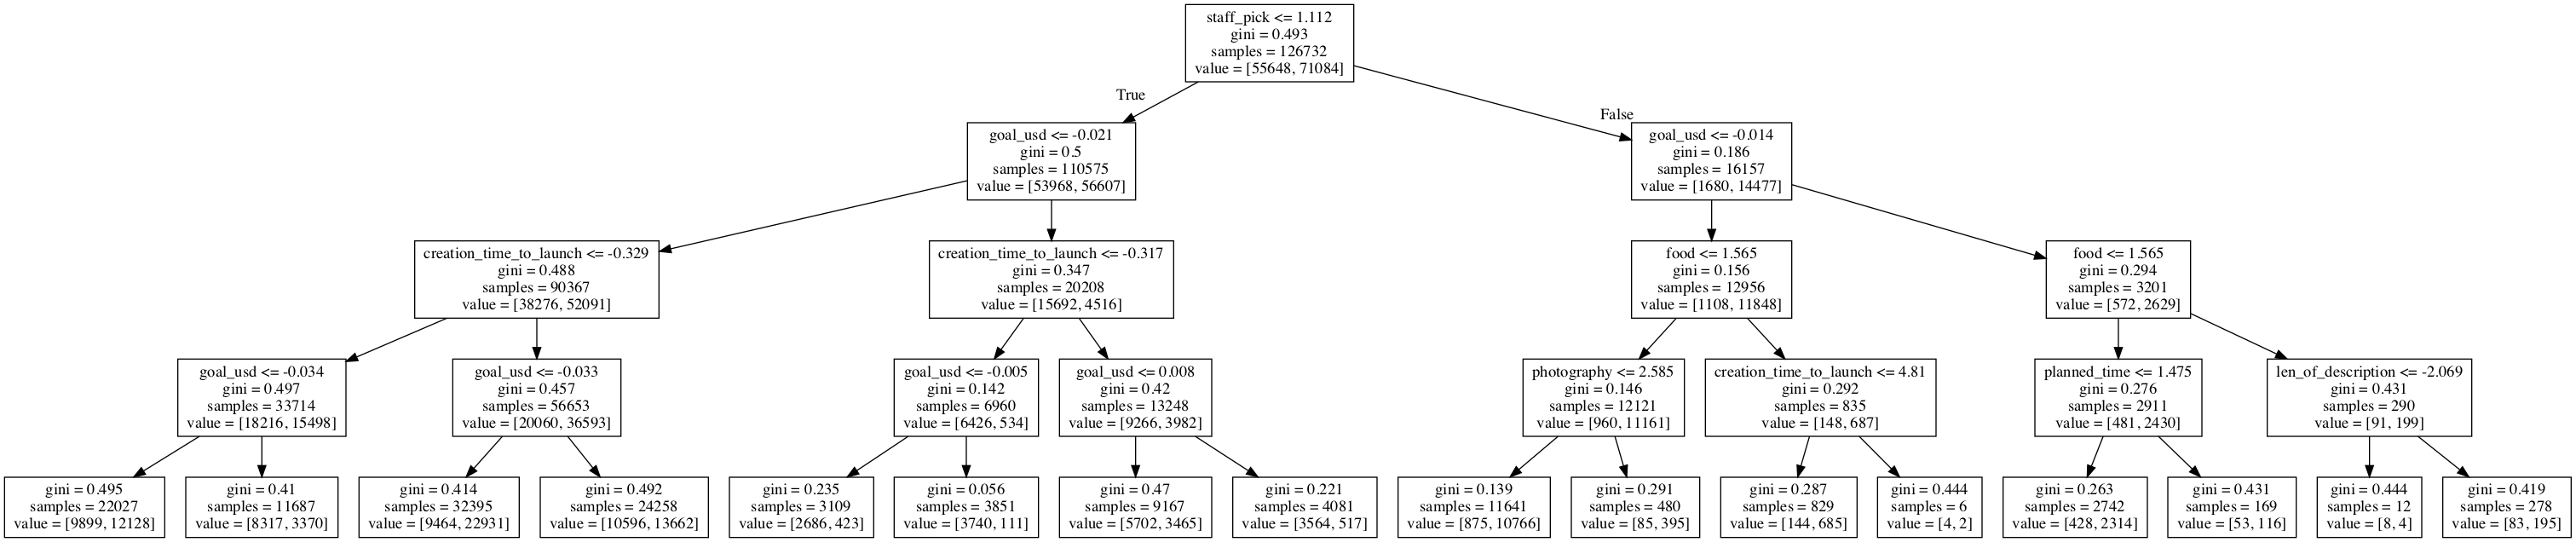

In [54]:
from IPython.display import Image
Image("Tree.png")

## KNN

In [20]:
###1. without scaling

In [1]:
X

NameError: name 'X' is not defined

In [21]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train, np.ravel(y_train))
y_pred = knn.predict(X_test)

In [22]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6411172919872175


In [23]:
confusion_matrix(y_test, y_pred)

array([[ 9887,  8663],
       [ 6498, 17197]])

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.53      0.57     18550
           1       0.67      0.73      0.69     23695

    accuracy                           0.64     42245
   macro avg       0.63      0.63      0.63     42245
weighted avg       0.64      0.64      0.64     42245



In [25]:
###2. with scaling
############################## DONT' TOUCH SINCE VERY COMPUTATIONAL EXPENSIVE

In [26]:
#knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', n_jobs=-1)
#knn.fit(X_train_scaled, np.ravel(y_train))
#y_pred = knn.predict(X_test_scaled)

In [27]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6411172919872175


In [28]:
confusion_matrix(y_test, y_pred)

array([[ 9887,  8663],
       [ 6498, 17197]])

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.53      0.57     18550
           1       0.67      0.73      0.69     23695

    accuracy                           0.64     42245
   macro avg       0.63      0.63      0.63     42245
weighted avg       0.64      0.64      0.64     42245



## Naive Bayes

In [30]:
##1st no scaling:

In [31]:
BernoulliNB, ComplementNB, GaussianNB

(sklearn.naive_bayes.BernoulliNB,
 sklearn.naive_bayes.ComplementNB,
 sklearn.naive_bayes.GaussianNB)

In [32]:
bernoullinb = BernoulliNB().fit(X_train, y_train)
complementnb = ComplementNB().fit(X_train, y_train)
gaussiannb = GaussianNB().fit(X_train, y_train)

In [33]:
bernoullinb.score(X_test, y_test)

0.6614510592969582

In [34]:
complementnb.score(X_test, y_test)

0.6310569298141792

In [35]:
gaussiannb.score(X_test, y_test)

0.5851343354243106

In [36]:
## with scaling:

In [37]:
bernoullinb = BernoulliNB().fit(X_train_scaled_NB, y_train)
complementnb = ComplementNB().fit(X_train_scaled_NB, y_train)
gaussiannb = GaussianNB().fit(X_train_scaled_NB, y_train)

In [38]:
bernoullinb.score(X_test_scaled_NB, y_test)

0.6614984021777726

In [39]:
complementnb.score(X_test_scaled_NB, y_test)

0.6646467037519233

In [40]:
gaussiannb.score(X_test_scaled_NB, y_test)

0.6431767073026393

## Ridge

In [41]:
# without scaling
clf = RidgeClassifier().fit(X_train, y_train)
print("test_score: ",(clf.score(X_test, y_test)))
print("train_score: ",(clf.score(X_train, y_train)))

test_score:  0.6871582435791218
train_score:  0.6862907552946375


/Users/fabianwerkmeister/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.43906e-18): result may not be accurate.
  overwrite_a=True).T


In [42]:
# with scaling
clf = RidgeClassifier().fit(X_train_scaled, y_train)
print("test_score: ",(clf.score(X_test_scaled, y_test)))
print("train_score: ",(clf.score(X_train_scaled, y_train)))

test_score:  0.6871582435791218
train_score:  0.6862986459615567


## Lasso

In [43]:
# default no scaling
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.025187876307243173
test score:  0.024355101783822386
number of features used:  3


In [44]:
# default with scaling

lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
train_score=lasso.score(X_train_scaled,y_train)
test_score=lasso.score(X_test_scaled,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.0
test score:  -1.1781908781927086e-10
number of features used:  0


In [45]:
# lasso with alpha 0,001 and no scaling

lasso = Lasso(alpha=0.001, max_iter=10e5)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.1739826769792986
test score:  0.17490457520705172
number of features used:  35


In [46]:
# lasso with alpha 0,001 and scaling

lasso = Lasso(alpha=0.001, max_iter=10e5)
lasso.fit(X_train_scaled,y_train)
train_score=lasso.score(X_train_scaled,y_train)
test_score=lasso.score(X_test_scaled,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.177515053026529
test score:  0.1784424158061273
number of features used:  54


## Random Forest

In [47]:
# no scaling
rnc = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

rnc.fit(X_train, y_train)
y_pred = rnc.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s


Accuracy:  0.7408450704225352
              precision    recall  f1-score   support

           0       0.73      0.64      0.69     18550
           1       0.75      0.82      0.78     23695

    accuracy                           0.74     42245
   macro avg       0.74      0.73      0.73     42245
weighted avg       0.74      0.74      0.74     42245

[[11935  6615]
 [ 4333 19362]]


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


In [48]:
# with scaling
rnc = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
rnc.fit(X_train_scaled, y_train)
y_pred = rnc.predict(X_test_scaled)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s


Accuracy:  0.7413658421114925
              precision    recall  f1-score   support

           0       0.73      0.64      0.69     18550
           1       0.75      0.82      0.78     23695

    accuracy                           0.74     42245
   macro avg       0.74      0.73      0.73     42245
weighted avg       0.74      0.74      0.74     42245

[[11938  6612]
 [ 4314 19381]]


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


## AdaBoost

In [49]:
# without scaling
#abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.7368919398745414
              precision    recall  f1-score   support

           0       0.72      0.65      0.68     18550
           1       0.75      0.81      0.77     23695

    accuracy                           0.74     42245
   macro avg       0.73      0.73      0.73     42245
weighted avg       0.74      0.74      0.73     42245

[[12049  6501]
 [ 4614 19081]]


## Gradiend Descent Boost

In [50]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, 
                                        max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.6797964256124985
              precision    recall  f1-score   support

           0       0.66      0.55      0.60     18550
           1       0.69      0.78      0.73     23695

    accuracy                           0.68     42245
   macro avg       0.68      0.67      0.67     42245
weighted avg       0.68      0.68      0.68     42245

[[10283  8267]
 [ 5260 18435]]


## XGBoost

In [52]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_test, y_test)
print(score)
y_pred = xgb_clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7437803290330217
Accuracy:  0.7437803290330217
              precision    recall  f1-score   support

           0       0.75      0.62      0.68     18550
           1       0.74      0.84      0.79     23695

    accuracy                           0.74     42245
   macro avg       0.75      0.73      0.73     42245
weighted avg       0.75      0.74      0.74     42245

[[11448  7102]
 [ 3722 19973]]
